In [45]:
import pandas as pd
import numpy as np

In [46]:


def load_and_clean_weld_data(file_path):
    columns = [
        "Carbon concentration / (weight%)",
        "Silicon concentration / (weight%)",
        "Manganese concentration / (weight%)",
        "Sulphur concentration / (weight%)",
        "Phosphorus concentration / (weight%)",
        "Nickel concentration / (weight%)",
        "Chromium concentration / (weight%)",
        "Molybdenum concentration / (weight%)",
        "Vanadium concentration / (weight%)",
        "Copper concentration / (weight%)",
        "Cobalt concentration / (weight%)",
        "Tungsten concentration / (weight%)",
        "Oxygen concentration / parts per million by weight",
        "Titanium concentration / parts per million by weight",
        "Nitrogen concentration / parts per million by weight",
        "Aluminium concentration / parts per million by weight",
        "Boron concentration / parts per million by weight",
        "Niobium concentration / parts per million by weight",
        "Tin concentration / parts per million by weight",
        "Arsenic concentration / parts per million by weight",
        "Antimony concentration / parts per million by weight",
        "Current / A",
        "Voltage / V",
        "AC or DC",
        "Electrode positive or negative",
        "Heat input / kJmm-1",
        "Interpass temperature / °C",
        "Type of weld",
        "Post weld heat treatment temperature / °C",
        "Post weld heat treatment time / hours",
        "Yield strength / MPa",
        "Ultimate tensile strength / MPa",
        "Elongation / %",
        "Reduction of Area / %",
        "Charpy temperature / °C",
        "Charpy impact toughness / J",
        "Hardness / kgmm-2",
        "50 % FATT",
        "Primary ferrite in microstructure / %",
        "Ferrite with second phase / %",
        "Acicular ferrite / %",
        "Martensite / %",
        "Ferrite with carbide aggreagate / %",
        "Weld ID"
    ]
    
    # Load data
    df = pd.read_csv(file_path, header=None, delim_whitespace=True, names=columns)
    
    # Replace 'N' with NaN
    df.replace("N", np.nan, inplace=True)
    
    # Columns to convert to numeric
    columns_to_convert = [
        'Sulphur concentration / (weight%)',
        'Phosphorus concentration / (weight%)',
        'Nickel concentration / (weight%)',
        'Chromium concentration / (weight%)',
        'Molybdenum concentration / (weight%)',
        'Vanadium concentration / (weight%)',
        'Copper concentration / (weight%)',
        'Cobalt concentration / (weight%)',
        'Tungsten concentration / (weight%)',
        'Oxygen concentration / parts per million by weight',
        'Titanium concentration / parts per million by weight',
        'Nitrogen concentration / parts per million by weight',
        'Aluminium concentration / parts per million by weight',
        'Boron concentration / parts per million by weight',
        'Niobium concentration / parts per million by weight',
        'Tin concentration / parts per million by weight',
        'Arsenic concentration / parts per million by weight',
        'Antimony concentration / parts per million by weight',
        'Current / A',
        'Voltage / V',
        'Interpass temperature / °C',
        'Post weld heat treatment temperature / °C',
        'Post weld heat treatment time / hours',
        'Yield strength / MPa',
        'Ultimate tensile strength / MPa',
        'Elongation / %',
        'Reduction of Area / %',
        'Charpy temperature / °C',
        'Charpy impact toughness / J',
        'Hardness / kgmm-2',
        '50 % FATT',
        'Primary ferrite in microstructure / %',
        'Ferrite with second phase / %',
        'Acicular ferrite / %',
        'Martensite / %',
        'Ferrite with carbide aggreagate / %'
    ]
    
    # Convert columns to numeric
    for column in columns_to_convert:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    
    return df


In [47]:
file_path = './data/welddb.data'
df = load_and_clean_weld_data(file_path)

In [48]:
print(df)

      Carbon concentration / (weight%)  Silicon concentration / (weight%)  \
0                                0.037                               0.30   
1                                0.037                               0.30   
2                                0.037                               0.30   
3                                0.037                               0.31   
4                                0.037                               0.31   
...                                ...                                ...   
1647                             0.100                               0.35   
1648                             0.088                               0.36   
1649                             0.090                               0.34   
1650                             0.092                               0.35   
1651                             0.180                               0.39   

      Manganese concentration / (weight%)  Sulphur concentration / (weight%

In [49]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df):
    df_encoded = df.copy()
    
    le = LabelEncoder()
    
    non_numeric_cols = df_encoded.select_dtypes(include=['object']).columns

    for column in non_numeric_cols:
        df_encoded[column] = le.fit_transform(df_encoded[column])
    
    return df_encoded


In [50]:
df_encoded = label_encode(df)

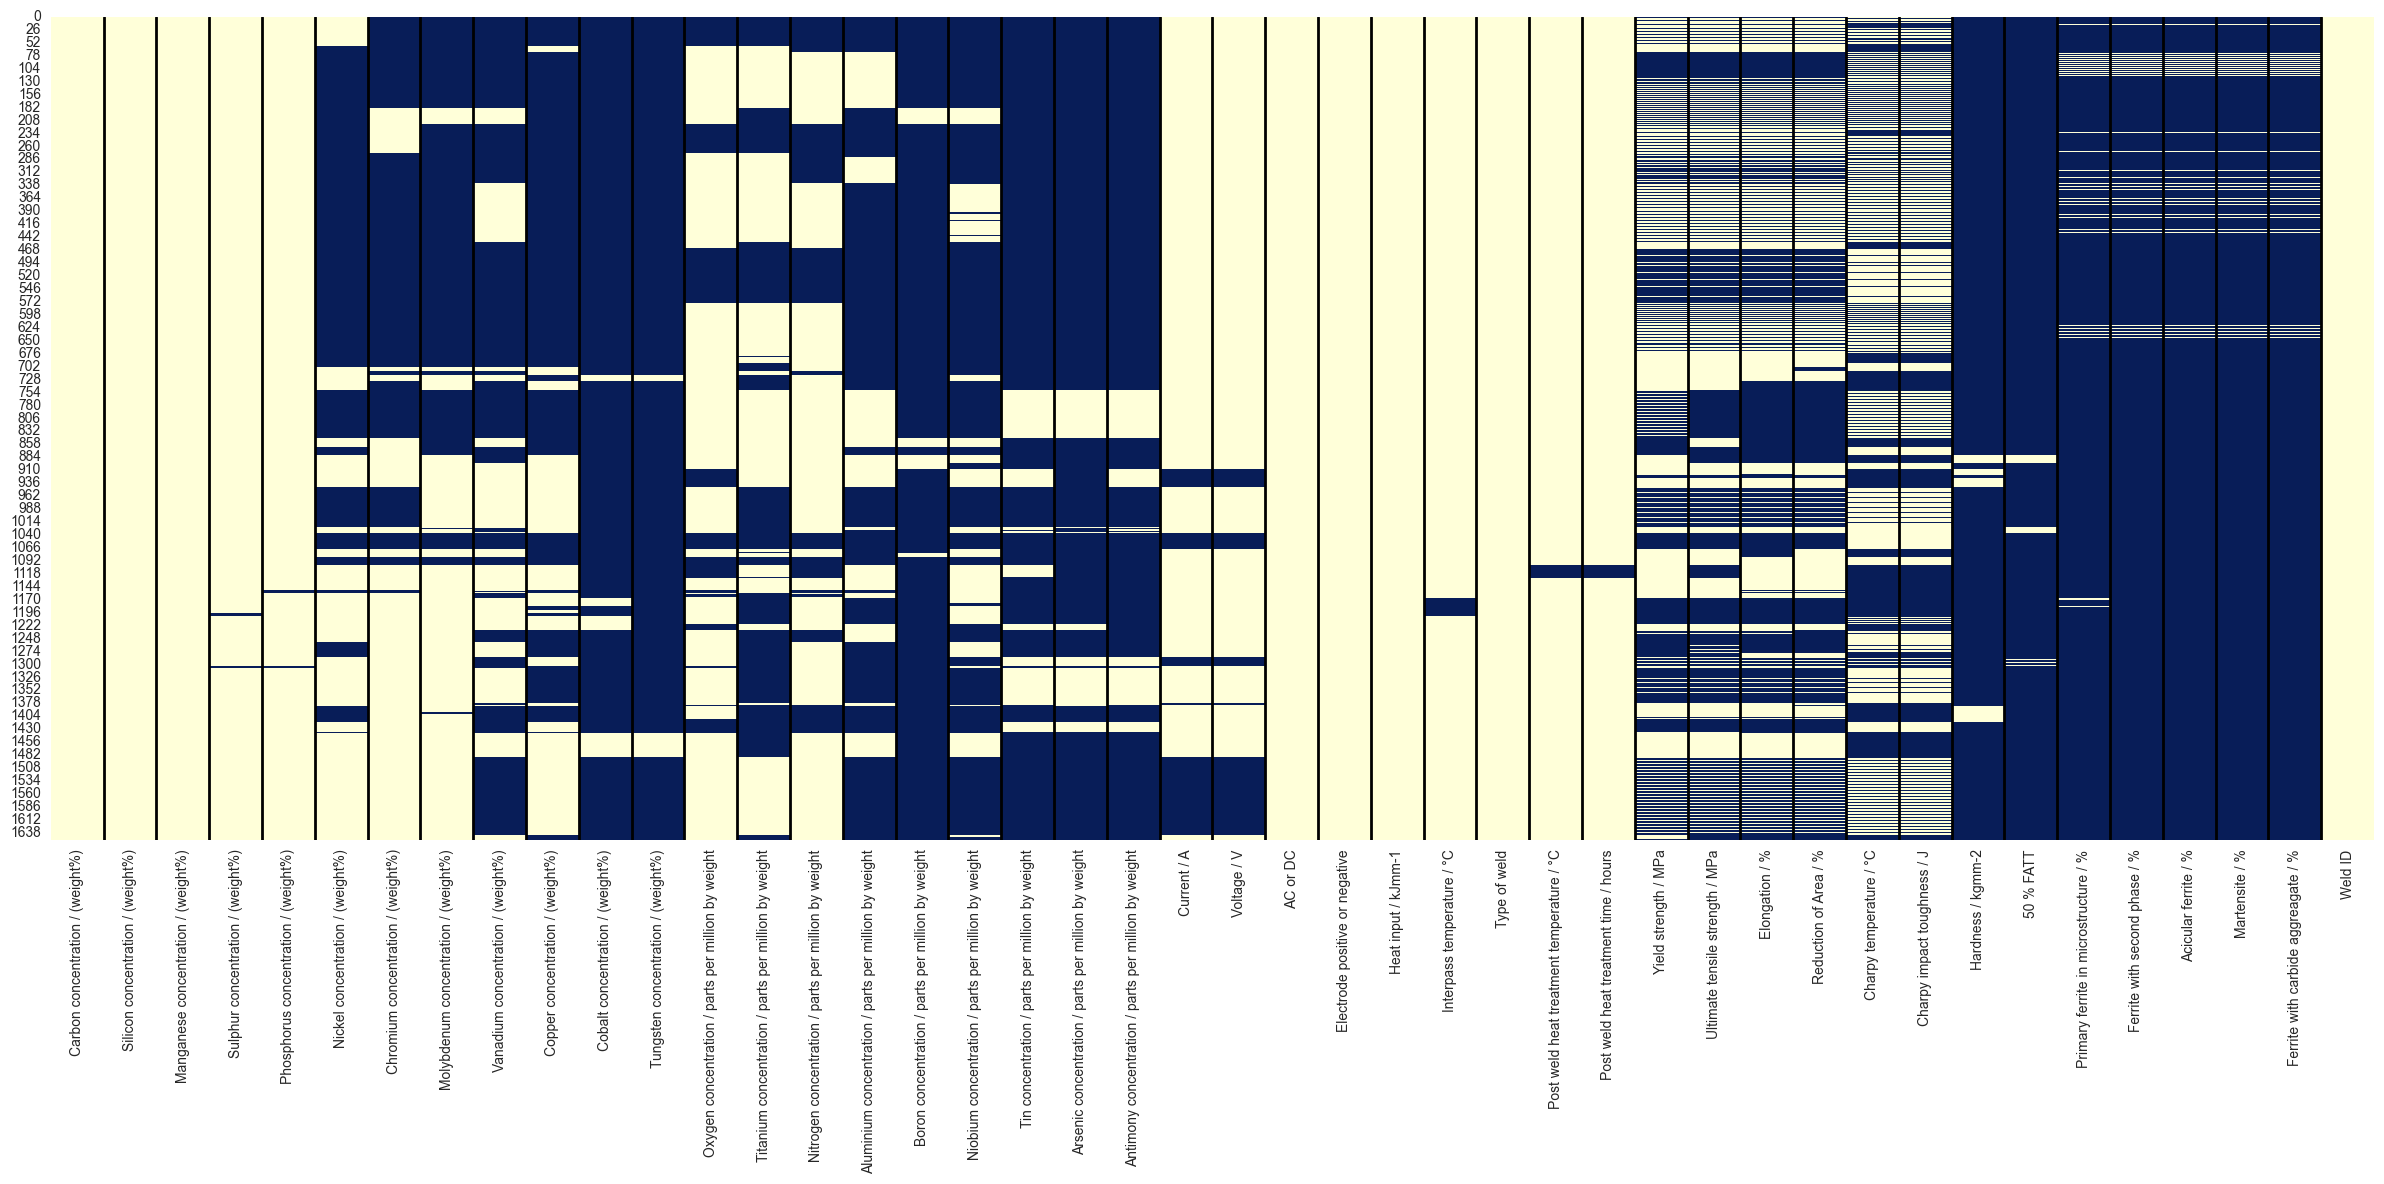

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_missing_data_heatmap(df):
    """
    Creates a heatmap to visualize missing values in the DataFrame.
    Yellow indicates non-missing values, and blue indicates missing values (NaN).
    """
    # Create a custom colormap - Yellow for non-missing values, Blue for missing values
    cmap = sns.color_palette("YlGnBu", as_cmap=True)

    # Create a figure for the heatmap
    plt.figure(figsize=(24, 12))
    sns.heatmap(df.isnull(), cbar=False, cmap=cmap)

    # Add vertical lines to separate each column
    for pos in range(1, len(df.columns)):
        plt.axvline(x=pos, color='black', linewidth=2)

    # Calculate the midpoint positions to label the columns
    midpoint_positions = [i - 0.5 for i in range(1, len(df.columns) + 1)]

    # Label the columns at the midpoint positions
    plt.xticks(ticks=midpoint_positions, labels=df.columns, rotation=90)

    # Adjust layout
    plt.tight_layout()

    # Display the plot
    plt.show()

plot_missing_data_heatmap(df_encoded)


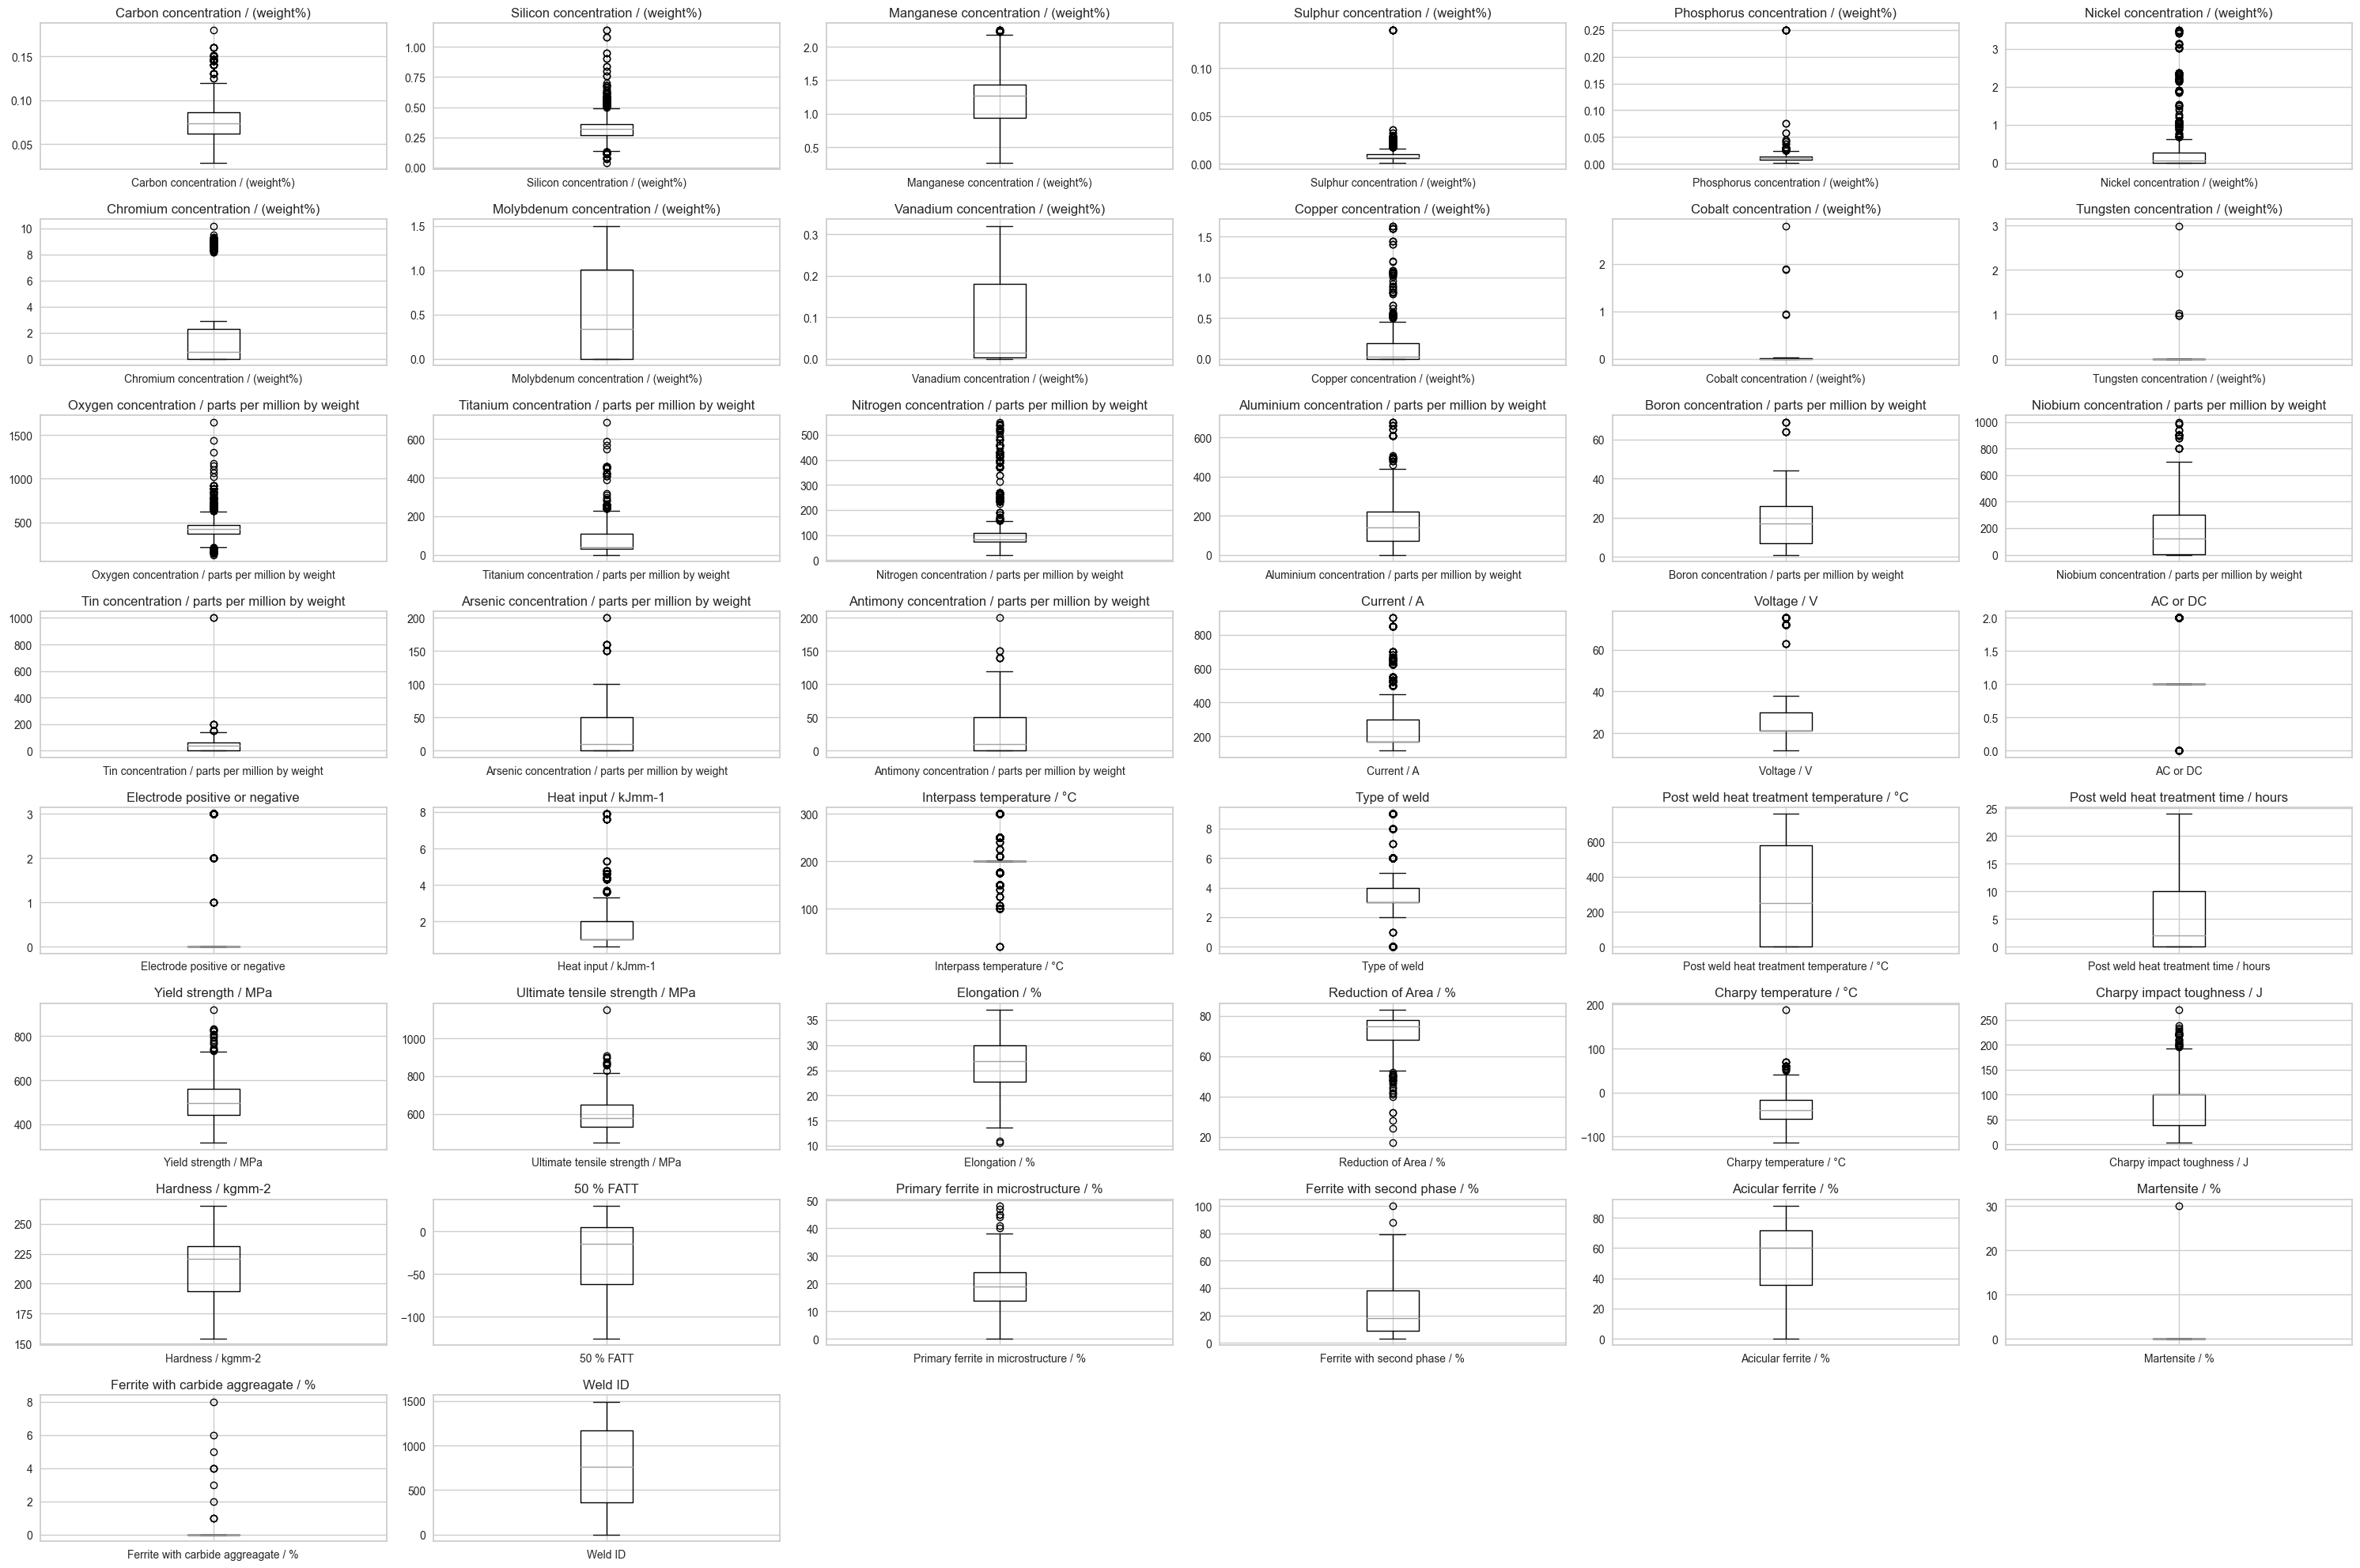

In [52]:
import matplotlib.pyplot as plt

def plot_boxplots(df, cols_per_row=6):
    """
    Generates a grid of boxplots for each column in the DataFrame.
    
    Parameters:
    - df: The DataFrame containing the data.
    - cols_per_row: Number of boxplots per row (default is 6).
    """
    # Number of columns in the DataFrame
    num_cols = len(df.columns)
    
    # Calculate the number of rows needed
    num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Adjusted for cases where columns don't divide evenly
    
    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(30, 20))
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    # Loop through DataFrame columns and plot boxplots
    for i, column in enumerate(df.columns):
        df.boxplot(column=column, ax=axes[i])  # Create a boxplot for each column
        axes[i].set_title(column)  # Set title for each subplot
    
    # Remove any unused axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()

plot_boxplots(df_encoded)


<Figure size 1000x600 with 0 Axes>

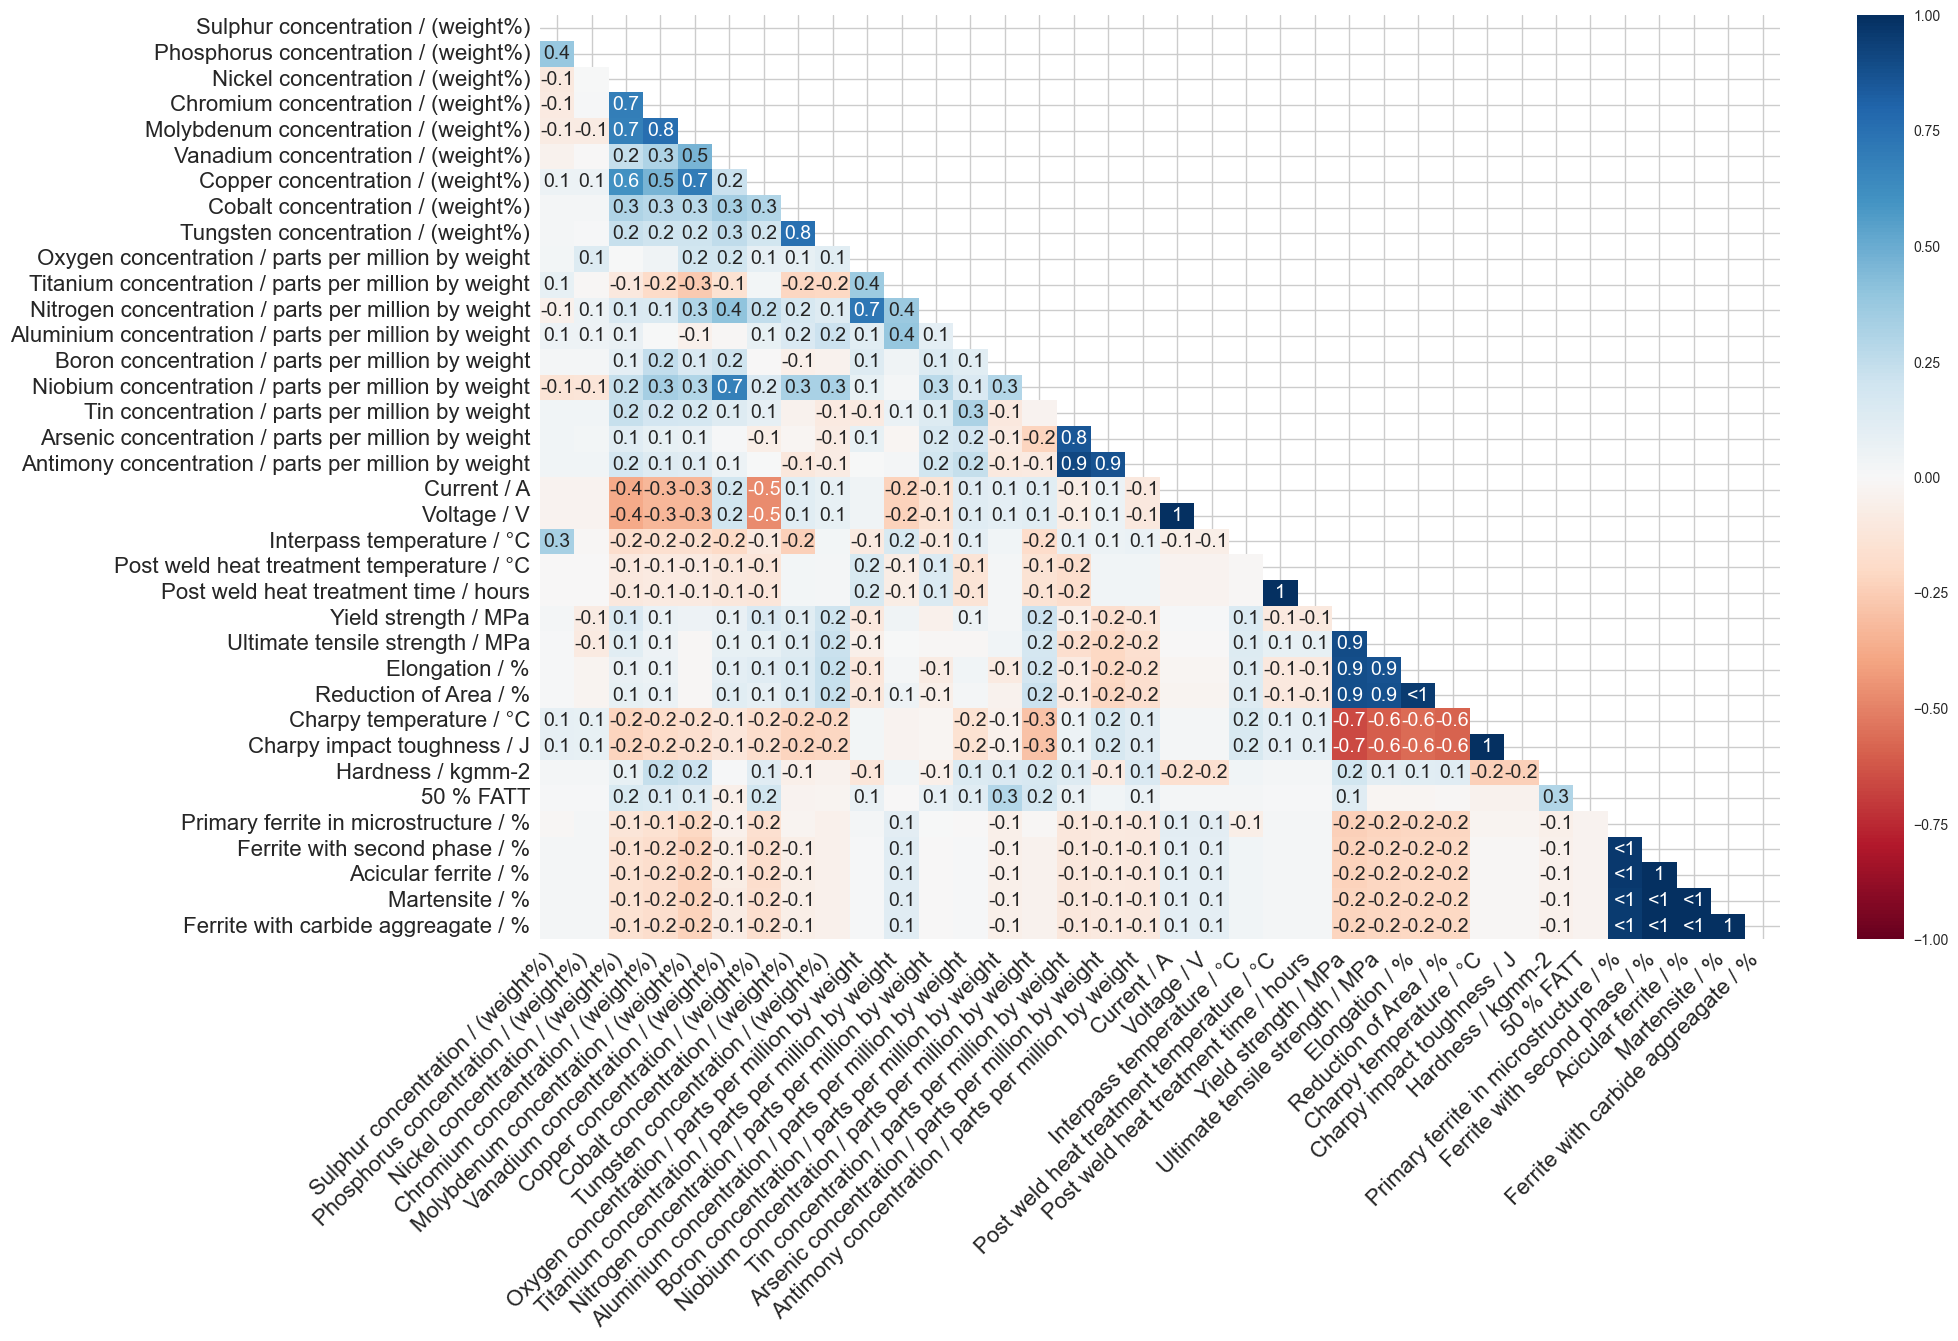

<Figure size 1000x600 with 0 Axes>

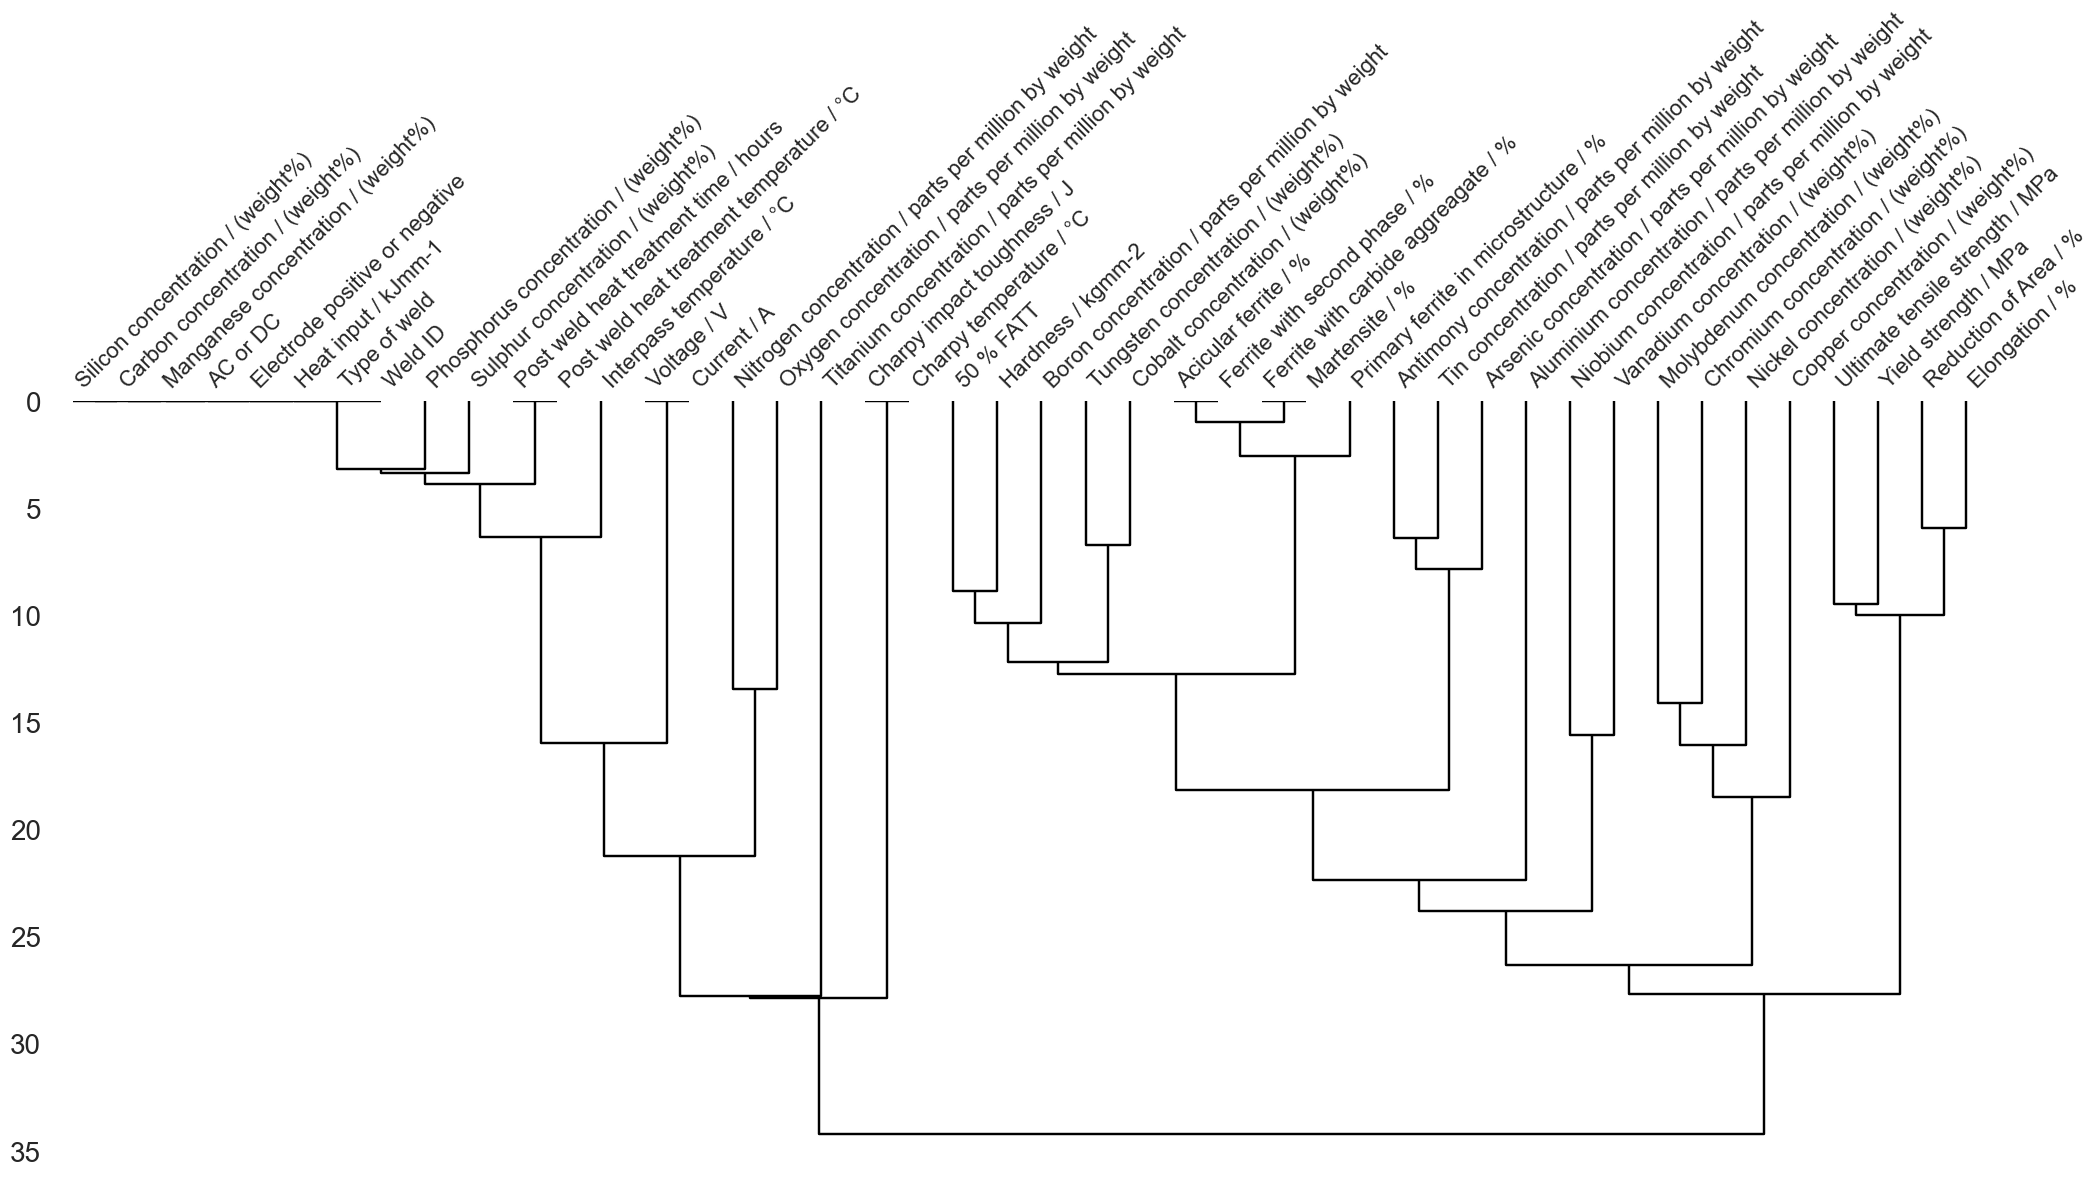

In [53]:
import missingno as msno
import matplotlib.pyplot as plt

def visualize_missing_data(df):
    """
    Visualizes missing data in a DataFrame using missingno heatmap, matrix, and dendrogram.
    
    - Heatmap: Shows correlation between missing values.
    - Matrix: Displays the missing values in the form of a bar.
    - Dendrogram: Shows clustering of missing values to indicate relationship between features.

    Conclusion: With these maps, it is likely that the missing data is not MNAR (Missing Not at Random).
    """
    # Plot heatmap: A value close to -1 means that if one variable is present, the other is likely missing.
    # A value close to 1 means if one is present, the other is likely present.
    plt.figure(figsize=(10, 6))
    msno.heatmap(df)
    plt.show()

    # Plot dendrogram: Correlation map, closer means more relation between features.
    plt.figure(figsize=(10, 6))
    msno.dendrogram(df)
    plt.show()

visualize_missing_data(df_encoded)



In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def test_normality(df):
    # Filtra apenas colunas numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    results = {}

    for column in numeric_cols:
        # Histograma
        #plt.figure(figsize=(10, 5))
        #sns.histplot(df[column], kde=True)
        #plt.title(f'Histogram with KDE for {column}')
        #plt.xlabel(column)
        #plt.ylabel('Frequency')
        #plt.show()

        # Q-Q Plot
        #plt.figure(figsize=(10, 5))
        #stats.probplot(df[column].dropna(), dist="norm", plot=plt)
        #plt.title(f'Q-Q Plot for {column}')
        #plt.show()

        # Teste de Shapiro-Wilk
        shapiro_stat, shapiro_p_value = stats.shapiro(df[column].dropna())
        results[column] = {'Shapiro-Wilk': (shapiro_stat, shapiro_p_value)}

        # Teste de Anderson-Darling
        ad_stat, critical_values, significance_level = stats.anderson(df[column].dropna(), dist='norm')
        results[column]['Anderson-Darling'] = (ad_stat, critical_values)

        # Teste de Kolmogorov-Smirnov
        ks_stat, ks_p_value = stats.kstest(df[column].dropna(), 'norm', args=(np.mean(df[column]), np.std(df[column])))
        results[column]['Kolmogorov-Smirnov'] = (ks_stat, ks_p_value)

    return results

# Usando a função
normality_results = test_normality(df)

# Exibindo os resultados
for column, tests in normality_results.items():
    print(f'\nResults for {column}:')
    for test, result in tests.items():
        print(f'  {test}: {result}')



Results for Carbon concentration / (weight%):
  Shapiro-Wilk: (0.9431978464126587, 1.0516741559227575e-24)
  Anderson-Darling: (27.616034729698413, array([0.575, 0.654, 0.785, 0.916, 1.089]))
  Kolmogorov-Smirnov: (0.1532540673380539, 2.4063346317786018e-34)

Results for Silicon concentration / (weight%):
  Shapiro-Wilk: (0.8943772912025452, 3.100423655643386e-32)
  Anderson-Darling: (32.77618557993901, array([0.575, 0.654, 0.785, 0.916, 1.089]))
  Kolmogorov-Smirnov: (0.14295439980257418, 6.382379493950972e-30)

Results for Manganese concentration / (weight%):
  Shapiro-Wilk: (0.9734995365142822, 6.776816134683588e-17)
  Anderson-Darling: (14.31154177220219, array([0.575, 0.654, 0.785, 0.916, 1.089]))
  Kolmogorov-Smirnov: (0.09202703417383407, 1.2611754957745558e-12)

Results for Sulphur concentration / (weight%):
  Shapiro-Wilk: (0.31780582666397095, 0.0)
  Anderson-Darling: (262.1736599732526, array([0.575, 0.654, 0.785, 0.916, 1.089]))
  Kolmogorov-Smirnov: (0.2713182566374849, 3

In [55]:
import pandas as pd
import numpy as np
from pyampute.exploration.mcar_statistical_tests import MCARTest
import seaborn as sns
import matplotlib.pyplot as plt



def analyze_missing_data(df):
    """Analyze missing data for the DataFrame using Little's MCAR test, considering only numeric columns."""
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Check percentage of missing values
    missing_percentage = numeric_df.isnull().mean() * 100
    print("Percentage of Missing Values:")
    print(missing_percentage)
    
    # Create an instance of MCARTest
    mcar_test = MCARTest(method='little')

    # Perform Little's MCAR test on the numeric DataFrame
    results = mcar_test.little_mcar_test(numeric_df)
    
    return results

# Example usage with your DataFrame
# df = pd.read_csv('your_data.csv')  # Load your data here
missing_data_results = analyze_missing_data(df)
print("p-value from Little's MCAR test:", missing_data_results)




Percentage of Missing Values:
Carbon concentration / (weight%)                          0.000000
Silicon concentration / (weight%)                         0.000000
Manganese concentration / (weight%)                       0.000000
Sulphur concentration / (weight%)                         0.665860
Phosphorus concentration / (weight%)                      0.605327
Nickel concentration / (weight%)                         57.808717
Chromium concentration / (weight%)                       52.542373
Molybdenum concentration / (weight%)                     52.118644
Vanadium concentration / (weight%)                       62.469734
Copper concentration / (weight%)                         65.859564
Cobalt concentration / (weight%)                         93.462470
Tungsten concentration / (weight%)                       96.186441
Oxygen concentration / parts per million by weight       23.970944
Titanium concentration / parts per million by weight     47.639225
Nitrogen concentration / parts p

In [63]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Função para imputação pela média
def impute_mean(df, columns=None):
    df_copy = df.copy()  # Criar uma cópia do DataFrame
    imputer = SimpleImputer(strategy='mean')
    if columns is None:
        columns = df_copy.columns
    df_copy[columns] = imputer.fit_transform(df_copy[columns])
    return df_copy

# Função para imputação pela mediana
def impute_median(df, columns=None):
    df_copy = df.copy()  # Criar uma cópia do DataFrame
    imputer = SimpleImputer(strategy='median')
    if columns is None:
        columns = df_copy.columns
    df_copy[columns] = imputer.fit_transform(df_copy[columns])
    return df_copy

# Função para imputação pela moda
def impute_mode(df, columns=None):
    df_copy = df.copy()  # Criar uma cópia do DataFrame
    imputer = SimpleImputer(strategy='most_frequent')
    if columns is None:
        columns = df_copy.columns
    df_copy[columns] = imputer.fit_transform(df_copy[columns])
    return df_copy

# Função para imputação múltipla
def impute_multiple(df, columns=None):
    df_copy = df.copy()  # Criar uma cópia do DataFrame
    imputer = IterativeImputer()
    if columns is None:
        columns = df_copy.columns
    df_copy[columns] = imputer.fit_transform(df_copy[columns])
    return df_copy

# Função para imputação por regressão
def impute_regression(df, target_column, features=None):
    df_copy = df.copy()  # Criar uma cópia do DataFrame
    if features is None:
        features = df_copy.columns[df_copy.columns != target_column]
    
    # Separar dados com e sem valores ausentes
    train_data = df_copy[df_copy[target_column].notnull()]
    test_data = df_copy[df_copy[target_column].isnull()]

    # Treinar o modelo de regressão
    model = LinearRegression()
    model.fit(train_data[features], train_data[target_column])
    
    # Prever valores ausentes
    predicted_values = model.predict(test_data[features])
    df_copy.loc[df_copy[target_column].isnull(), target_column] = predicted_values
    return df_copy

# Função para imputação por KNN
def impute_knn(df, columns=None):
    df_copy = df.copy()  # Criar uma cópia do DataFrame
    imputer = KNNImputer(n_neighbors=3)
    if columns is None:
        columns = df_copy.columns
    df_copy[columns] = imputer.fit_transform(df_copy[columns])
    return df_copy

# Função para imputação usando máxima verossimilhança (ML)
def impute_ml(df, columns=None):
    df_copy = df.copy()  # Criar uma cópia do DataFrame
    imputer = IterativeImputer()
    if columns is None:
        columns = df_copy.columns
    df_copy[columns] = imputer.fit_transform(df_copy[columns])
    return df_copy

# Função para imputação por substituição de padrão (exemplo simples)
def impute_pattern_substitution(df, pattern_column, columns=None):
    df_copy = df.copy()  # Criar uma cópia do DataFrame
    if columns is None:
        columns = df_copy.columns

    for col in columns:
        if col != pattern_column:
            df_copy[col] = df_copy[col].fillna(df_copy[pattern_column])  # Substituir por valores da coluna padrão
    return df_copy

import pandas as pd
from sklearn.impute import KNNImputer

# Função de imputação personalizada
def custom_imputation(df, columns=None):
    df_copy = df.copy()  # Criar uma cópia do DataFrame
    
    # Passo 1: Substituir NaNs nas colunas que contém "concentration" no nome por 0
    concentration_columns = [col for col in df_copy.columns if 'concentration' in col.lower()]
    df_copy[concentration_columns] = df_copy[concentration_columns].fillna(0)
    return df_copy


# Função geral para imputação
def impute_data(df, method, *args, **kwargs):
    if method == 'mean':
        return impute_mean(df, *args, **kwargs)
    elif method == 'median':
        return impute_median(df, *args, **kwargs)
    elif method == 'mode':
        return impute_mode(df, *args, **kwargs)
    elif method == 'multiple':
        return impute_multiple(df, *args, **kwargs)
    elif method == 'regression':
        return impute_regression(df, *args, **kwargs)
    elif method == 'knn':
        return impute_knn(df, *args, **kwargs)
    elif method == 'ml':
        return impute_ml(df, *args, **kwargs)
    elif method == 'pattern':
        return impute_pattern_substitution(df, *args, **kwargs)
    elif method == 'custom':
        return custom_imputation(df, *args, **kwargs)
    else:
        raise ValueError(f"Method '{method}' is not recognized.")


df_mean = impute_data(df_encoded, 'mean')
df_median = impute_data(df_encoded, 'median')
df_mode = impute_data(df_encoded, 'mode')
df_multiple = impute_data(df_encoded, 'multiple')
#df_regression = impute_data(df, 'regression')
df_knn = impute_data(df_encoded, 'knn')
df_ml = impute_data(df_encoded, 'ml')
#df_pattern = impute_data(df, 'pattern')  



In [67]:
df_custom = impute_data(df, "custom")

# Contando os NaNs em cada coluna
nan_counts = df_custom.isnull().sum()

# Exibindo as colunas com NaNs e suas contagens
print(nan_counts[nan_counts > 0])


Current / A                                   248
Voltage / V                                   248
AC or DC                                      215
Electrode positive or negative                156
Interpass temperature / °C                     38
Post weld heat treatment temperature / °C      13
Post weld heat treatment time / hours          13
Yield strength / MPa                          872
Ultimate tensile strength / MPa               914
Elongation / %                                952
Reduction of Area / %                         947
Charpy temperature / °C                       773
Charpy impact toughness / J                   773
Hardness / kgmm-2                            1572
50 % FATT                                    1621
Primary ferrite in microstructure / %        1556
Ferrite with second phase / %                1562
Acicular ferrite / %                         1562
Martensite / %                               1563
Ferrite with carbide aggreagate / %          1563


In [66]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_robust = scaler.fit_transform(df_ml)

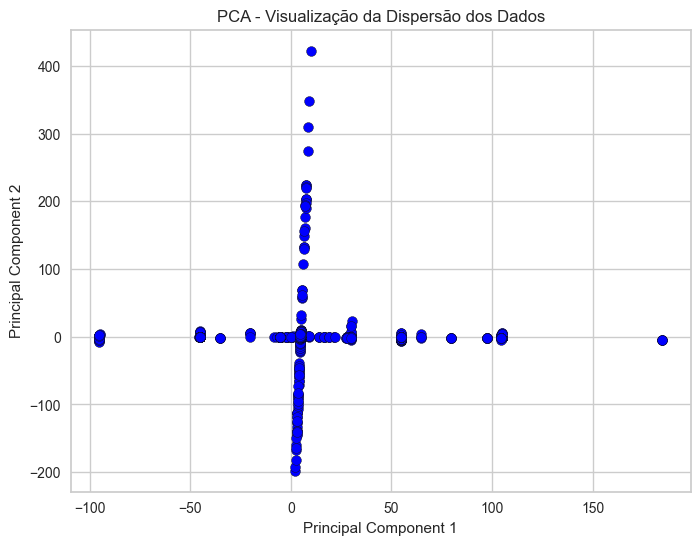

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assumindo que df_normalized já está normalizado (pode ser o df_standardized ou outro)
pca = PCA(n_components=2)  # Reduz para 2 componentes principais para visualização
principal_components = pca.fit_transform(df_robust)

# Visualização
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Visualização da Dispersão dos Dados')
plt.show()

VALORES DE CONCENTRAÇÕES DE MN, NI E ETC PODEM SER SETADOS PARA ZEROS EM CASO DE NANS POIS AS IMPUTAÇÕES PODEM SER MUITO RUINS EM QUALQUER ANALISE(vi no texto)

dados tbm foram normalizados (pag 56)

Junção de modelos para esses casos foram mais eficientes do que apenas um modelo(Trabalho do Joseph e o paper falam disso)
Jospeh usou 3 e o paper 5

Usar cold learning and selflearning labels



In [59]:


# init setup
from pycaret.regression import *
clf1 = setup(data = df_knn, target = 'Yield strength / MPa')

# compare models
best = compare_models()

,Description,Value
0,Session id,2370
1,Target,Yield strength / MPa
2,Target type,Regression
3,Original data shape,"(1652, 44)"
4,Transformed data shape,"(1652, 44)"
5,Transformed train set shape,"(1156, 44)"
6,Transformed test set shape,"(496, 44)"
7,Numeric features,43
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,8.2581,310.6880,17.2543,0.9558,0.0319,0.0160,0.1010
xgboost,Extreme Gradient Boosting,9.4522,351.3778,18.4718,0.9484,0.0350,0.0186,0.2490
lightgbm,Light Gradient Boosting Machine,10.0498,366.6607,18.6597,0.9477,0.0354,0.0198,0.1800
rf,Random Forest Regressor,10.4100,442.9566,20.4792,0.9374,0.0390,0.0206,0.1960
gbr,Gradient Boosting Regressor,13.2642,454.6430,21.1845,0.9339,0.0406,0.0264,0.0810
dt,Decision Tree Regressor,12.9193,820.4741,27.3468,0.8791,0.0517,0.0253,0.0110
ada,AdaBoost Regressor,22.6098,995.8205,31.2898,0.8570,0.0631,0.0464,0.0380
knn,K Neighbors Regressor,25.3728,1596.1643,39.5557,0.7720,0.0758,0.0502,0.0360
ridge,Ridge Regression,34.1681,2237.7910,47.2112,0.6699,0.0947,0.0698,0.0060
lr,Linear Regression,34.0864,2241.5505,47.2640,0.6692,0.0954,0.0698,0.3350


In [ ]:
# init setup
from pycaret.regression import *
clf1 = setup(data = df_multiple, target = 'Yield strength / MPa', preprocess = False)

# compare models
best = compare_models()

,Description,Value
0,Session id,1576
1,Target,Yield strength / MPa
2,Target type,Regression
3,Original data shape,"(1652, 44)"
4,Transformed data shape,"(1652, 44)"
5,Transformed train set shape,"(1156, 44)"
6,Transformed test set shape,"(496, 44)"
7,Numeric features,43


TypeError: 'int' object is not iterable

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

# Supondo que df_knn é o DataFrame que já foi tratado
# Definindo a variável alvo (target) e as features (X)
X = df_ml.drop('Yield strength / MPa', axis=1)  # Substitua 'target' pela sua coluna alvo
y = df_ml['Yield strength / MPa']  # Substitua 'target' pela sua coluna alvo

# Dividindo os dados em treino (70%), validação (15%) e teste (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Criando o modelo XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

# Treinando o modelo com o conjunto de treino
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando o R²
r2 = r2_score(y_test, y_pred)

# Calculando o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Exibindo os resultados
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R²: 0.9746
RMSE: 16.9574
